In [1]:
import pandas as pd

df = pd.read_parquet("C:/Users/mehme/NYC_TAXI_TRIP/data/processed/train_sample.parquet")
df.head(), df.shape

(          id  vendor_id     pickup_datetime    dropoff_datetime  \
 0  id2793718          2 2016-06-08 07:36:19 2016-06-08 07:53:39   
 1  id3485529          2 2016-04-03 12:58:11 2016-04-03 13:11:58   
 2  id1816614          2 2016-06-05 02:49:13 2016-06-05 02:59:27   
 3  id1050851          2 2016-05-05 17:18:27 2016-05-05 17:32:54   
 4  id2734699          2 2016-04-14 12:17:42 2016-04-14 12:23:56   
 
    passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
 0                1        -73.985611        40.735943         -73.980331   
 1                1        -73.978394        40.764351         -73.991623   
 2                5        -73.989059        40.744389         -73.973381   
 3                2        -73.990326        40.731136         -73.991264   
 4                3        -73.969833        40.768570         -73.962646   
 
    dropoff_latitude store_and_fwd_flag  trip_duration  
 0         40.760468                  N           1040  
 1         4

In [2]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
vendor_id,99001.0,1.535378,1.0,1.0,2.0,2.0,2.0,0.498749
pickup_datetime,99001,2016-04-01 07:59:46.147725824,2016-01-01 00:05:39,2016-02-17 18:09:53,2016-04-01 12:00:47,2016-05-15 02:01:54,2016-06-30 23:59:10,NaN
dropoff_datetime,99001,2016-04-01 08:13:14.819052800,2016-01-01 00:10:46,2016-02-17 18:21:57,2016-04-01 12:16:34,2016-05-15 02:12:26,2016-07-01 00:41:36,NaN
passenger_count,99001.0,1.667892,0.0,1.0,1.0,2.0,6.0,1.316821
pickup_longitude,99001.0,-73.974166,-77.896019,-73.991989,-73.981827,-73.96756,-72.074333,0.0393
pickup_latitude,99001.0,40.751209,35.310307,40.737591,40.754139,40.768459,41.033432,0.033781
dropoff_longitude,99001.0,-73.973807,-79.817978,-73.991371,-73.979759,-73.963142,-72.022408,0.042045
dropoff_latitude,99001.0,40.751921,35.173546,40.736042,40.754532,40.769924,41.149899,0.03812
trip_duration,99001.0,808.671327,2.0,393.0,655.0,1062.0,3464.0,578.600191


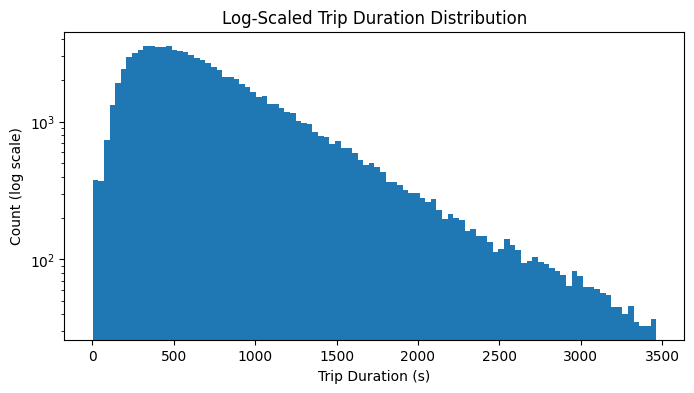

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(df['trip_duration'], bins=100, log=True)
plt.xlabel("Trip Duration (s)")
plt.ylabel("Count (log scale)")
plt.title("Log-Scaled Trip Duration Distribution")
plt.show()

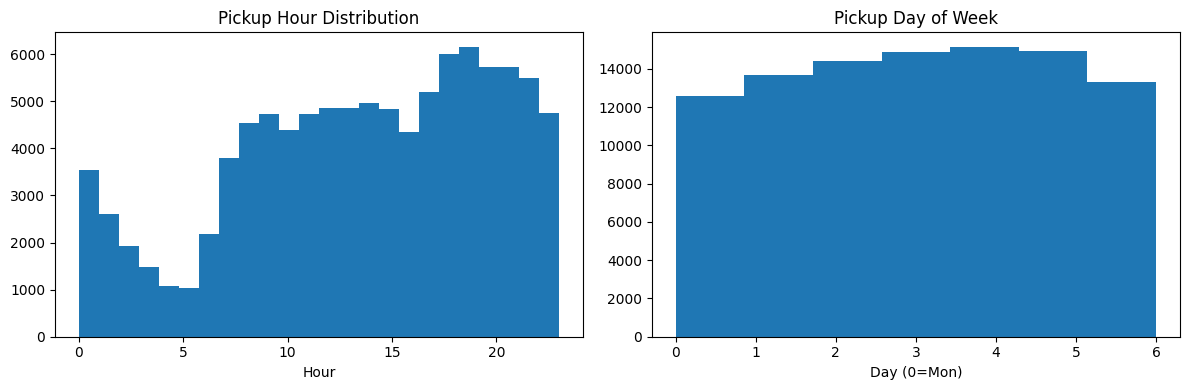

In [4]:
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek  # 0=Monday

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(df['pickup_hour'], bins=24)
axes[0].set_title("Pickup Hour Distribution")
axes[0].set_xlabel("Hour")
axes[1].hist(df['pickup_dayofweek'], bins=7)
axes[1].set_title("Pickup Day of Week")
axes[1].set_xlabel("Day (0=Mon)")
plt.tight_layout()
plt.show()

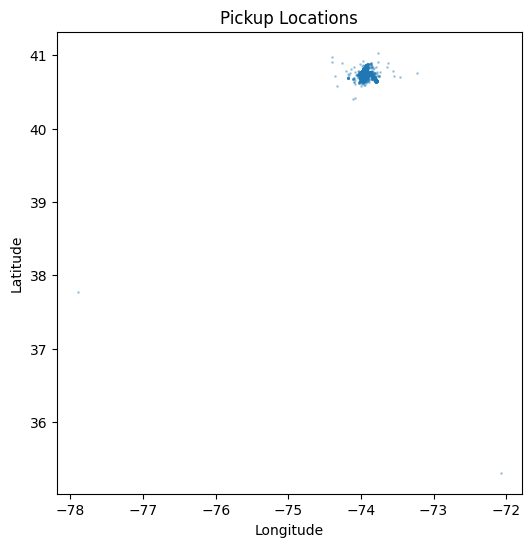

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(df['pickup_longitude'], df['pickup_latitude'], s=1, alpha=0.3)
plt.title("Pickup Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [6]:
import os, sys
# proje kökünü path’e ekle
sys.path.insert(0, os.path.abspath(".."))

from src.features import add_distance, add_time_features
import pandas as pd

df = pd.read_parquet("C:/Users/mehme/NYC_TAXI_TRIP/data/processed/train_sample.parquet")
df_feat = add_distance(df)
df_feat = add_time_features(df_feat)

# Sütunları kontrol et
print(df_feat.columns)
df_feat[['distance_km','hour_sin','hour_cos','dow_sin','dow_cos']].head()


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance_km', 'pickup_hour', 'hour_sin', 'hour_cos',
       'pickup_dow', 'dow_sin', 'dow_cos'],
      dtype='object')


,distance_km,hour_sin,hour_cos,dow_sin,dow_cos
0,2.763050,9.659258e-01,-0.258819,0.974928,-0.222521
1,1.959178,1.224647e-16,-1.000000,-0.781831,0.623490
2,1.404772,5.000000e-01,0.866025,-0.781831,0.623490
3,1.978660,-9.659258e-01,-0.258819,0.433884,-0.900969
4,0.624626,1.224647e-16,-1.000000,0.433884,-0.900969


In [7]:
from src.features import add_all_features
import pandas as pd

df = pd.read_parquet("C:/Users/mehme/NYC_TAXI_TRIP/data/processed/train_sample.parquet")
df_feat = add_all_features(df, cluster_k=10)


In [8]:
from src.features import add_all_features
import pandas as pd

df = pd.read_parquet("C:/Users/mehme/NYC_TAXI_TRIP/data/processed/train_sample.parquet")
df_feat = add_all_features(df, cluster_k=10)
print(df_feat.columns)
df_feat.head()

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance_km', 'bearing', 'speed_kmh',
       'dist_to_center_km', 'is_weekend', 'pickup_hour', 'hour_sin',
       'hour_cos', 'pickup_dow', 'dow_sin', 'dow_cos', 'pickup_cluster',
       'dropoff_cluster'],
      dtype='object')


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dist_to_center_km,is_weekend,pickup_hour,hour_sin,hour_cos,pickup_dow,dow_sin,dow_cos,pickup_cluster,dropoff_cluster
0,id2793718,2,2016-06-08 07:36:19,2016-06-08 07:53:39,1,-73.985611,40.735943,-73.980331,40.760468,N,...,2.552596,0,7,9.659258e-01,-0.258819,2,0.974928,-0.222521,2,0
1,id3485529,2,2016-04-03 12:58:11,2016-04-03 13:11:58,1,-73.978394,40.764351,-73.991623,40.749859,N,...,0.830548,1,12,1.224647e-16,-1.000000,6,-0.781831,0.623490,0,0
2,id1816614,2,2016-06-05 02:49:13,2016-06-05 02:59:27,5,-73.989059,40.744389,-73.973381,40.748692,N,...,1.646760,1,2,5.000000e-01,0.866025,6,-0.781831,0.623490,0,0
3,id1050851,2,2016-05-05 17:18:27,2016-05-05 17:32:54,2,-73.990326,40.731136,-73.991264,40.748917,N,...,3.117617,0,17,-9.659258e-01,-0.258819,3,0.433884,-0.900969,2,0
4,id2734699,2,2016-04-14 12:17:42,2016-04-14 12:23:56,3,-73.969833,40.768570,-73.962646,40.767181,N,...,1.678328,0,12,1.224647e-16,-1.000000,3,0.433884,-0.900969,8,8


In [9]:
import os, sys
import numpy as np
import pandas as pd
import joblib

# Proje köküne çıkmak için
ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(ROOT)

from src.preprocessing import load_and_sample, clean
from src.features import add_all_features

# 1) Veri Hazırla
df = load_and_sample(os.path.join(ROOT, "data", "raw", "NYC.csv"), n=100_000)
df = clean(df)
df = add_all_features(df, cluster_k=10)

# 2) Modeli yükle (Random Forest çünkü en iyi öyle kaydedildi)
model = joblib.load(os.path.join(ROOT, "model_best_random_forest.pkl"))

# 3) Tahmin & hata hesapla
feature_cols = [
    'distance_km','bearing','speed_kmh','dist_to_center_km',
    'is_weekend','hour_sin','hour_cos','dow_sin','dow_cos',
    'pickup_cluster','dropoff_cluster','passenger_count'
]
X = df[feature_cols].values
y = df['trip_duration'].values
y_pred = model.predict(X)
errors = np.abs(y_pred - y)

# 4) Hata istatistikleri
print("Hata ortalaması :", errors.mean())
print("Hata medyanı     :", np.median(errors))
print("Hatanın %95’i >", np.percentile(errors,95))

# 5) En büyük 10 sapma ve o örneklerin detayları
idx = np.argsort(errors)[-10:][::-1]
out = df.loc[idx, ['pickup_datetime','pickup_cluster','dropoff_cluster','distance_km','trip_duration']].copy()
out['error_s'] = errors[idx]
print(out)

Hata ortalaması : 2.7834399652528754
Hata medyanı     : 0.6100000000000136
Hatanın %95’i > 6.25
          pickup_datetime  pickup_cluster  dropoff_cluster  distance_km  \
59217 2016-06-19 11:40:02               2                2     0.013594   
95481 2016-02-04 16:35:58               6                6     0.000000   
54301 2016-04-26 11:35:52               0                0     0.000000   
22550 2016-06-07 09:21:02               6                6     0.000000   
67193 2016-02-06 15:43:15               4                4     0.000000   
86790 2016-06-03 08:56:25               9                9     0.000000   
43901 2016-03-08 13:28:10               1                1     0.000000   
80067 2016-03-21 00:17:51               1                1     0.000000   
15911 2016-03-17 08:01:29               6                6     0.324022   
57164 2016-06-27 10:10:06               8                6    31.239618   

       trip_duration  error_s  
59217           3374  2229.58  
95481         

C:\Users\mehme\NYC_TAXI_TRIP\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


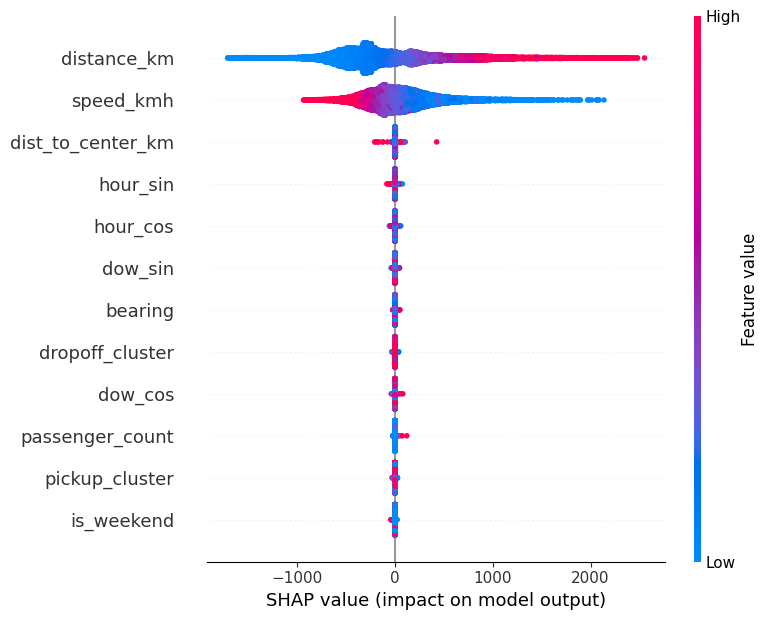

In [10]:
import os, sys
import pandas as pd
import shap
import joblib

ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(ROOT)
from src.preprocessing import load_and_sample, clean
from src.features import add_all_features

# Veri & model
df = load_and_sample(os.path.join(ROOT, "data", "raw", "NYC.csv"), n=20_000)
df = clean(df)
df = add_all_features(df, cluster_k=10)
model = joblib.load(os.path.join(ROOT, "model_best_random_forest.pkl"))

X = pd.DataFrame(df, columns=[
    'distance_km','bearing','speed_kmh','dist_to_center_km',
    'is_weekend','hour_sin','hour_cos','dow_sin','dow_cos',
    'pickup_cluster','dropoff_cluster','passenger_count'
])

# Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# 1) Global
shap.summary_plot(shap_values, X)

# 2) Lokal (örnek index i)
i = 5
shap.force_plot(explainer.expected_value, shap_values[i], X.iloc[i])